In [1]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!pip install -q roboflow

In [2]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt

# Clean up the notebook
clean_notebook()


Notebook cleaned.


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="IiCyX0joEG8iDZg5LT1H")
project = rf.workspace("labs-hsbu3").project("male-female-ujxy5")
version = project.version(6)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Male/Female-6 in yolov8:: 100%|██████████| 2012/2012 [00:00<00:00, 2040.56it/s]


In [10]:
import yaml

# Define the paths to your datasets
train_path = r'C:\Users\noteh\Documents\Learning\AIMaster-training-2024\Homework\HW5\Male\Female-6\train'
val_path = r'C:\Users\noteh\Documents\Learning\AIMaster-training-2024\Homework\HW5\Male\Female-6\valid'
test_path = r'C:\Users\noteh\Documents\Learning\AIMaster-training-2024\Homework\HW5\Male\Female-6\test'  # Optional, if you have a test dataset

# Define the number of classes and their names
num_classes = 2
class_names = ['Male', 'Woman']

# Create a dictionary to hold the YAML data
data = {
    'train': train_path,
    'val': val_path,
    'test': test_path,
    'nc': num_classes,
    'names': class_names,

}

# Write the dictionary to a YAML file
with open('mydata.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("mydata.yaml file created successfully.")

mydata.yaml file created successfully.


In [15]:
!yolo task=detect mode=train epochs=20 batch=16 plots=True \
model='./weights/yolov10n.pt' \
data='./mydata.yaml' \
hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 degrees=30 translate=0.1 scale=0.5 shear=0 perspective=0 flipud=0 fliplr=0.5 mosaic=1 mixup=0 copy_paste=0.25

New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'


train: Scanning C:\Users\noteh\Documents\Learning\AIMaster-training-2024\Homework\HW5\Male\Female-6\train\labels.cache... 850 images, 0 backgrounds, 0 corrupt: 100%|██████████| 850/850 [00:00<?, ?it/s]
train: Scanning C:\Users\noteh\Documents\Learning\AIMaster-training-2024\Homework\HW5\Male\Female-6\train\labels.cache... 850 images, 0 backgrounds, 0 corrupt: 100%|██████████| 850/850 [00:00<?, ?it/s]

val: Scanning C:\Users\noteh\Documents\Learning\AIMaster-training-2024\Homework\HW5\Male\Female-6\valid\labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
val: Scanning C:\Users\noteh\Documents\Learning\AIMaster-training-2024\Homework\HW5\Male\Female-6\valid\labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]
       1/20      3.14G      2.295      3.413      2.988      1.858      7.332      2.552         38        640:   0%|          | 0/54 [00:00<?, ?it/s]
       1/


Ultralytics YOLOv8.1.34 🚀 Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
engine\trainer: task=detect, mode=train, model=./weights/yolov10n.pt, data=./mydata.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

In [16]:
from IPython.display import Image
from ultralytics import YOLOv10

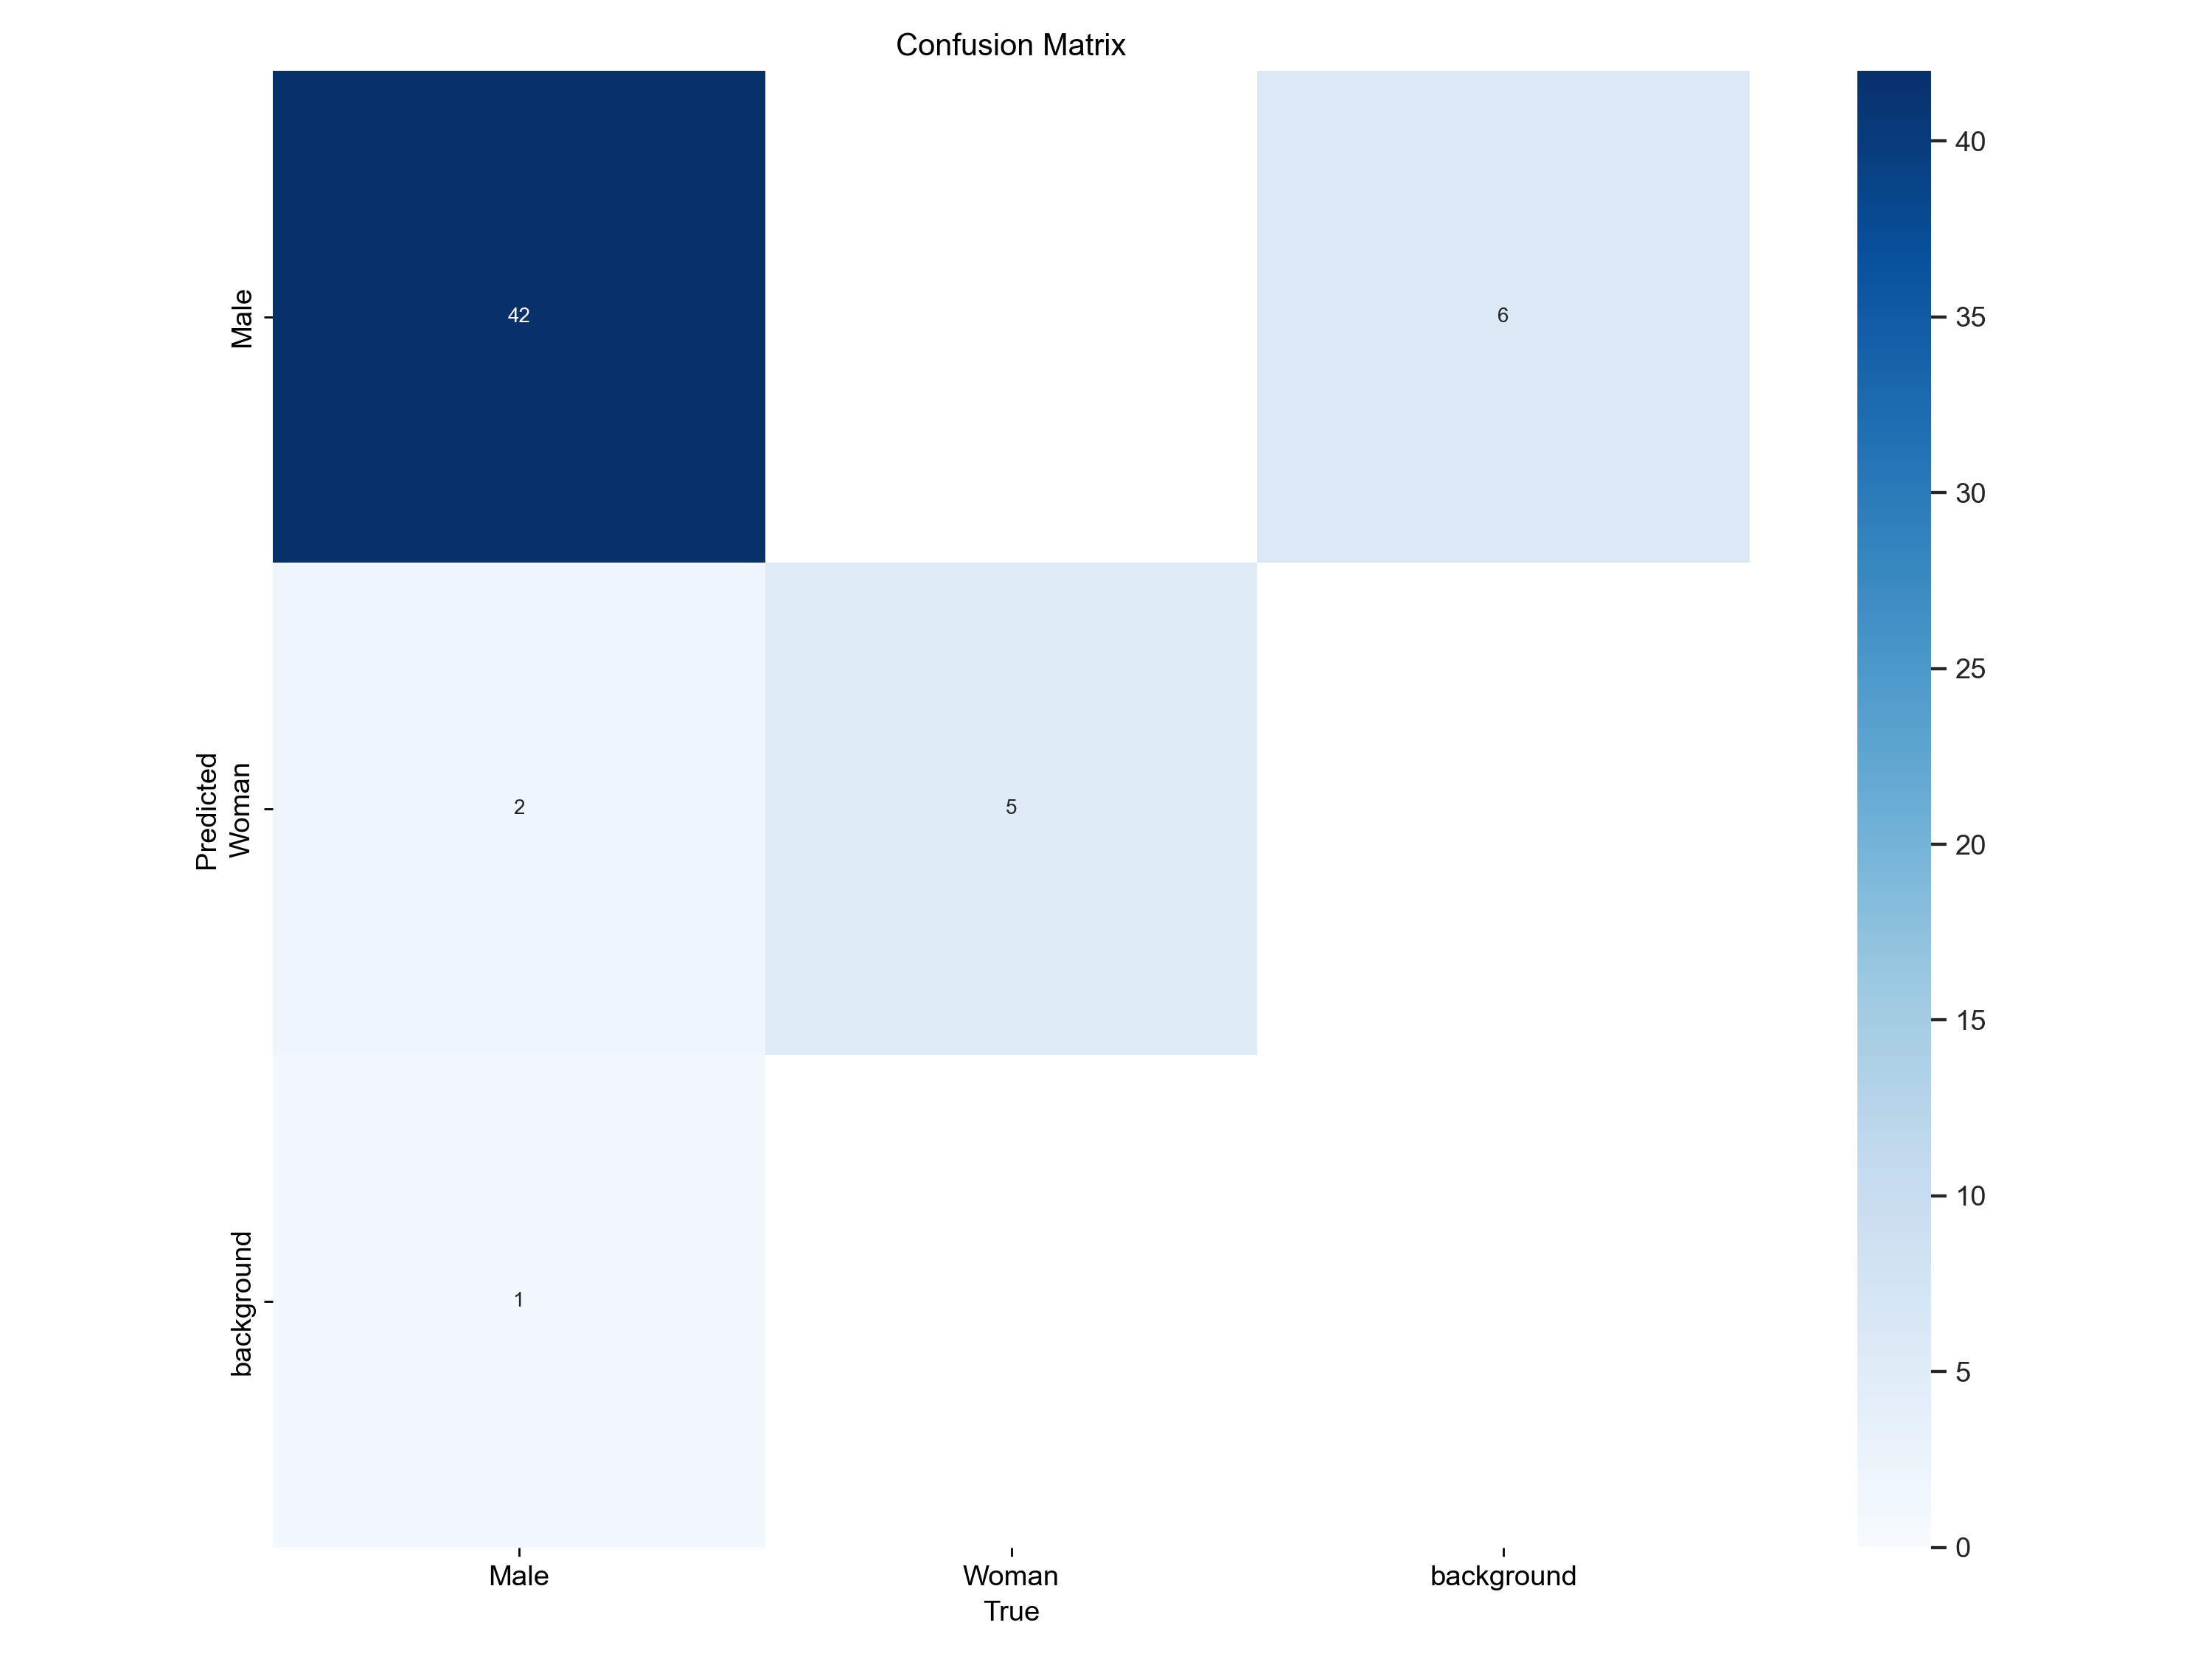

In [17]:
Image(filename='./runs/detect/train/confusion_matrix.png', width=600)

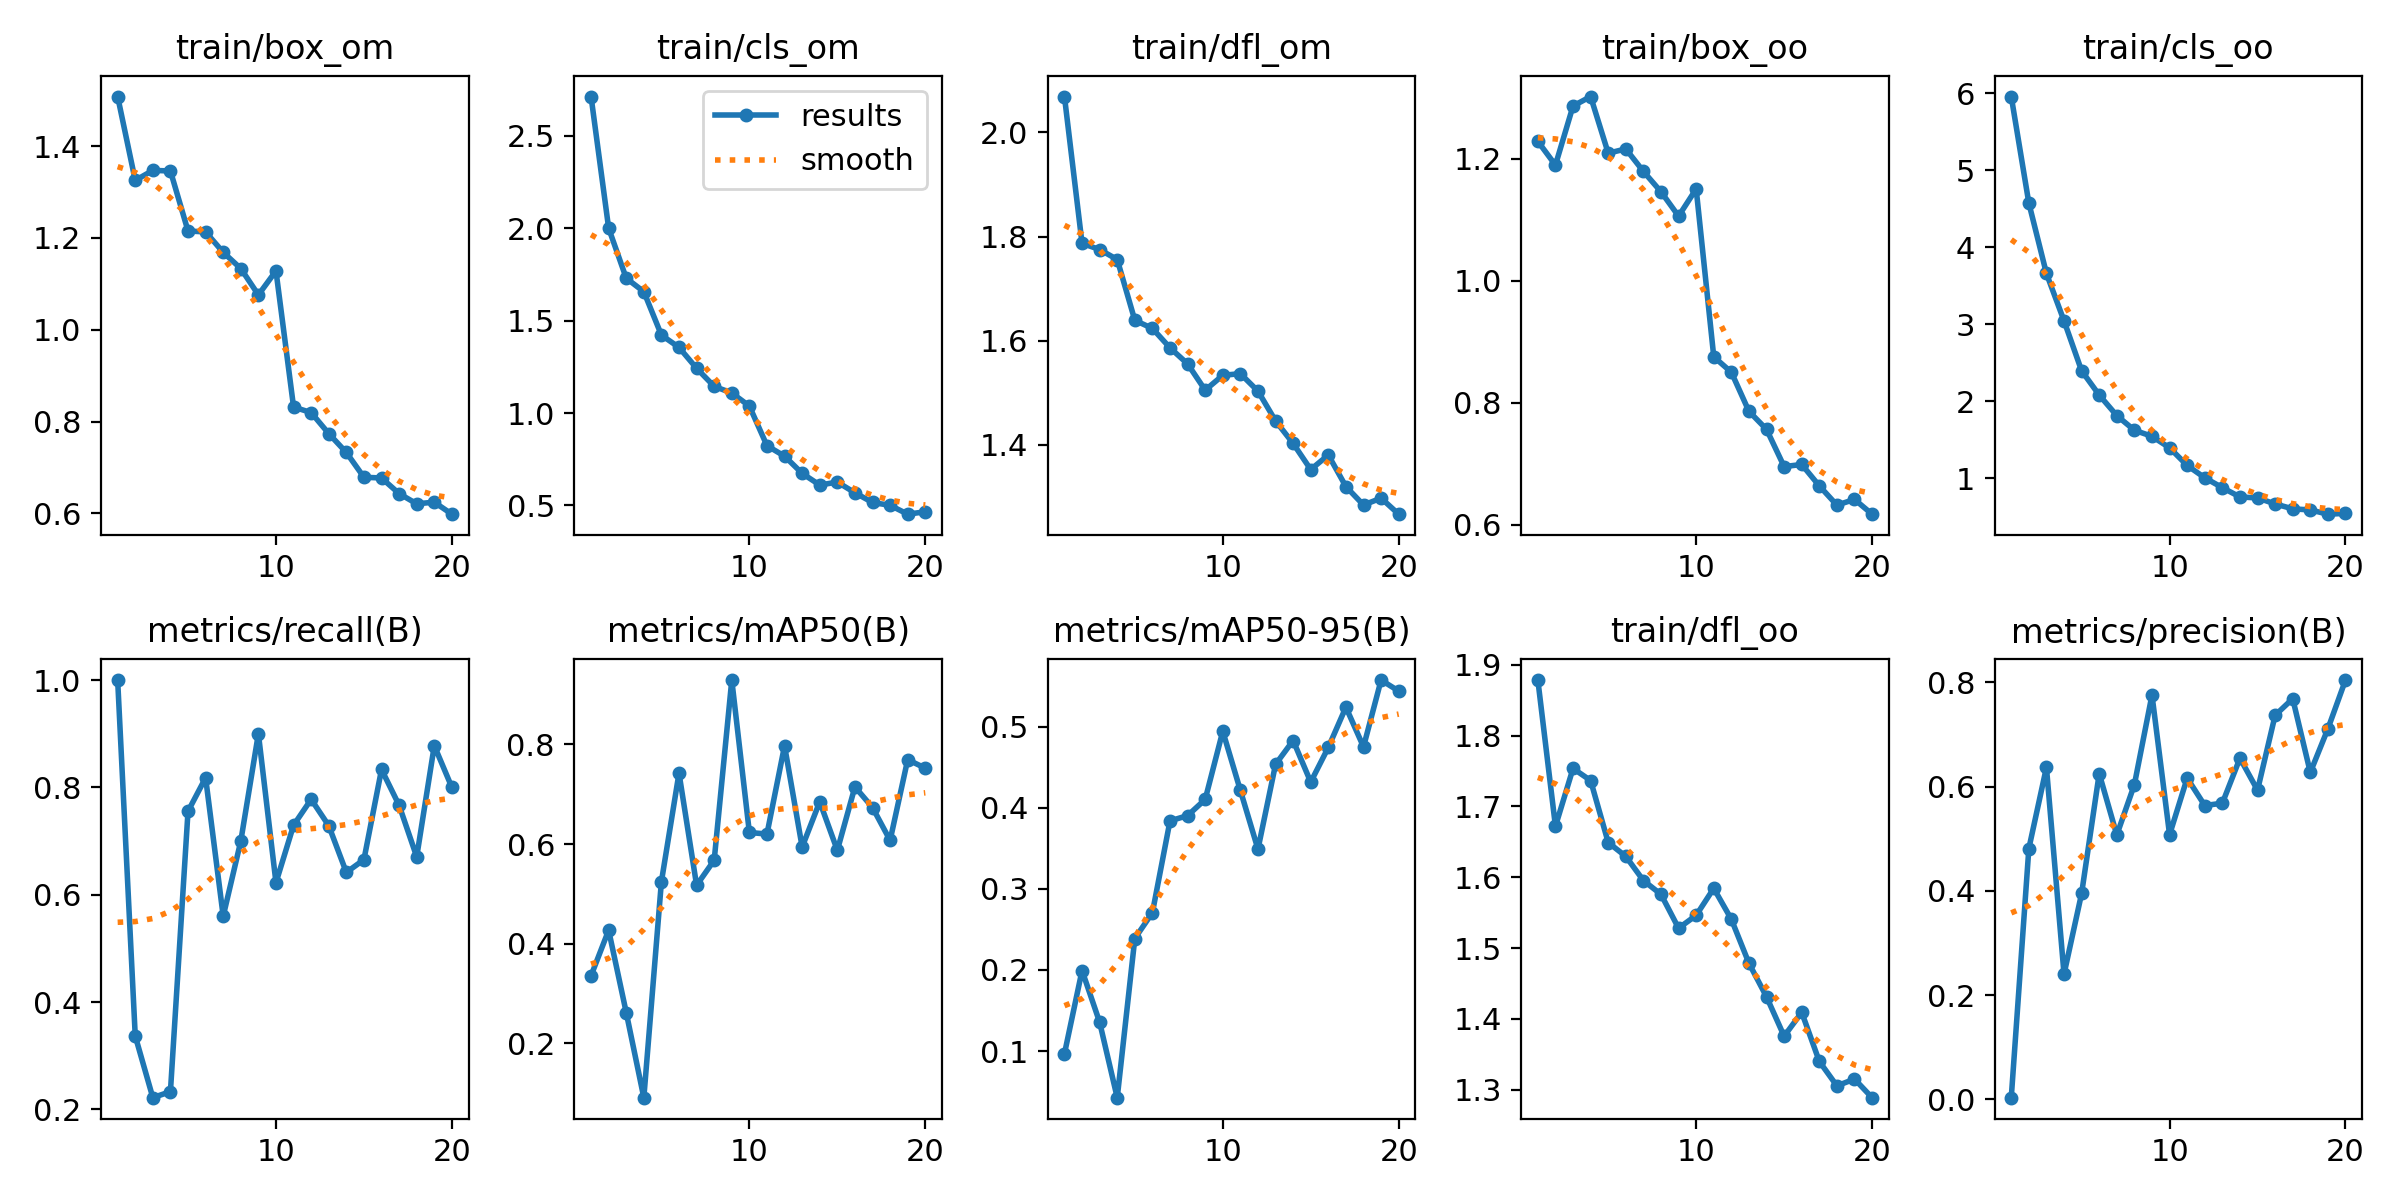

In [20]:
Image(filename='./runs/detect/train/results.png', width=600)

In [21]:
model_path = './runs/detect/train/weights/best.pt'
model = YOLOv10(model_path)
results = model(source='./Male/Female-6/test/images', conf=0.25,save=True)


image 1/100 c:\Users\noteh\Documents\Learning\AIMaster-training-2024\Homework\HW5\Male\Female-6\test\images\0-1-_png.rf.5e6349d0a57e85db480382c6f0c79db2.jpg: 640x640 1 Woman, 13.0ms
image 2/100 c:\Users\noteh\Documents\Learning\AIMaster-training-2024\Homework\HW5\Male\Female-6\test\images\0-100-_jpg.rf.8f2efc04c16705284466ee1aaae107d1.jpg: 640x640 1 Woman, 13.0ms
image 3/100 c:\Users\noteh\Documents\Learning\AIMaster-training-2024\Homework\HW5\Male\Female-6\test\images\0-1015-_jpg.rf.9ae2007a8a453ae28ab660623d039fc8.jpg: 640x640 1 Woman, 14.0ms
image 4/100 c:\Users\noteh\Documents\Learning\AIMaster-training-2024\Homework\HW5\Male\Female-6\test\images\0-1027-_jpg.rf.712345e75c5533eb8f8bf889339994e0.jpg: 640x640 1 Woman, 13.0ms
image 5/100 c:\Users\noteh\Documents\Learning\AIMaster-training-2024\Homework\HW5\Male\Female-6\test\images\0-1047-_jpg.rf.c791fdeb0ca9aaa1b279d2ead7bea1a6.jpg: 640x640 1 Woman, 13.0ms
image 6/100 c:\Users\noteh\Documents\Learning\AIMaster-training-2024\Homework\

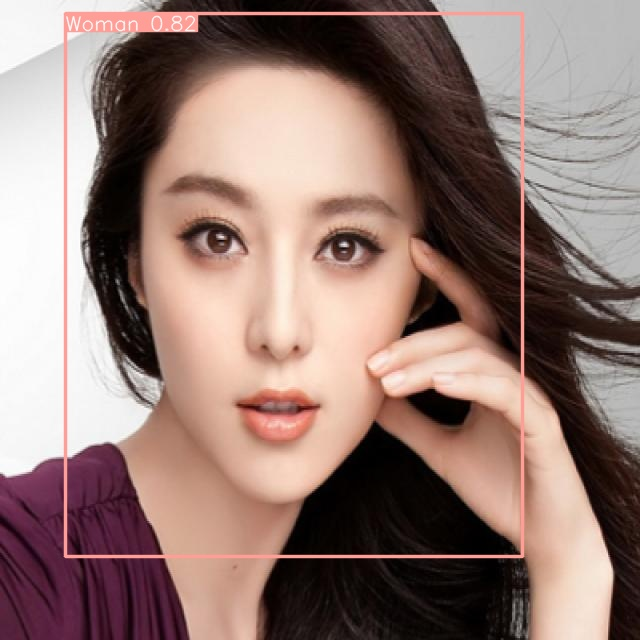

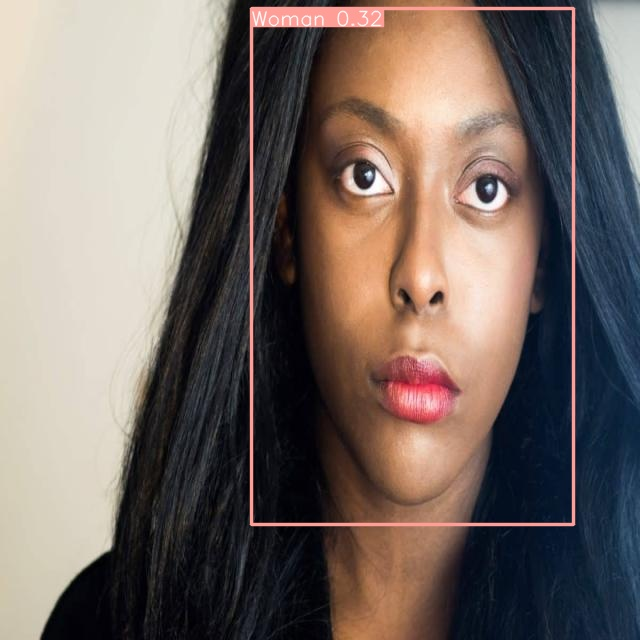

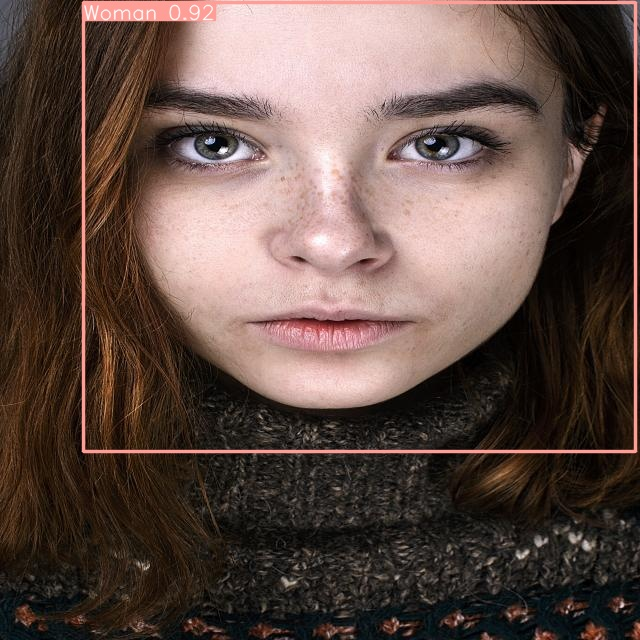

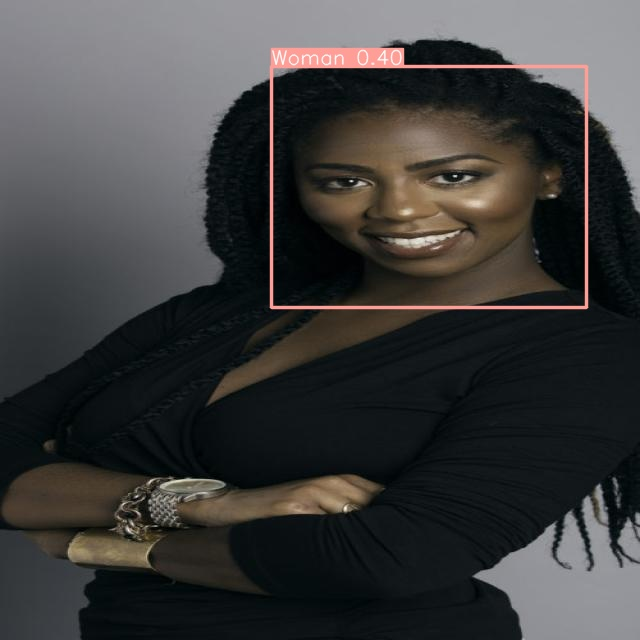

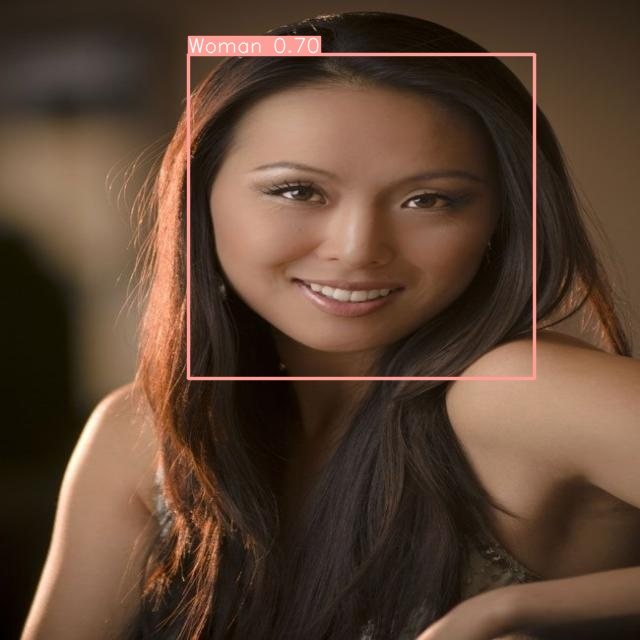

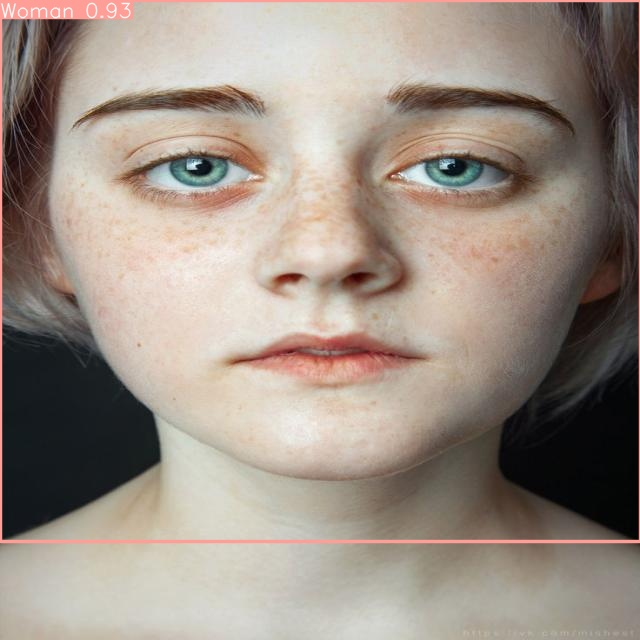

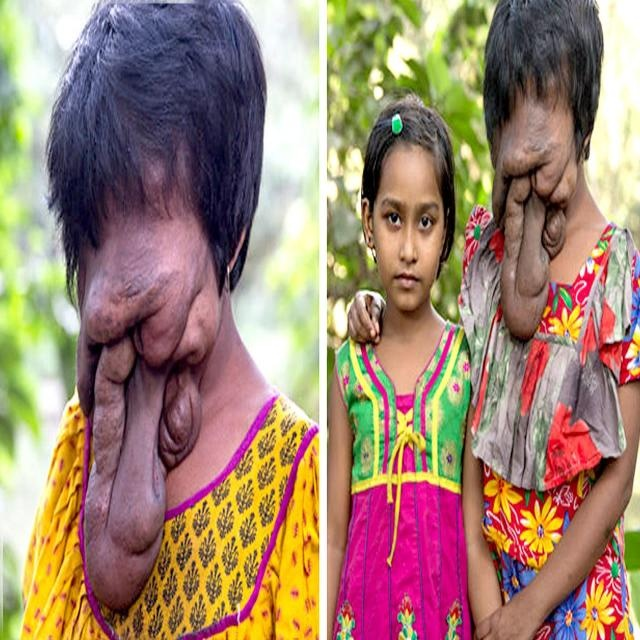

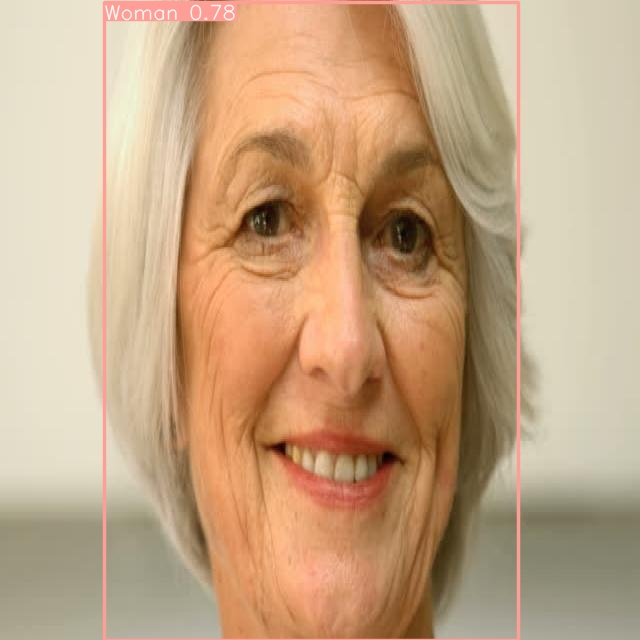

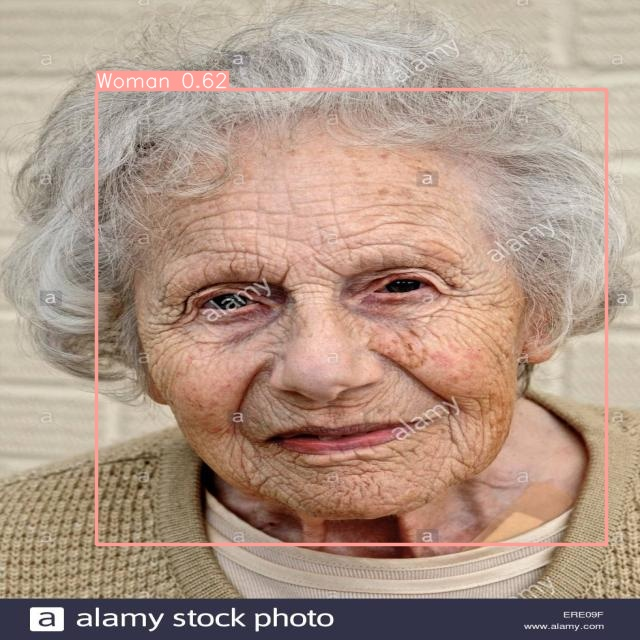

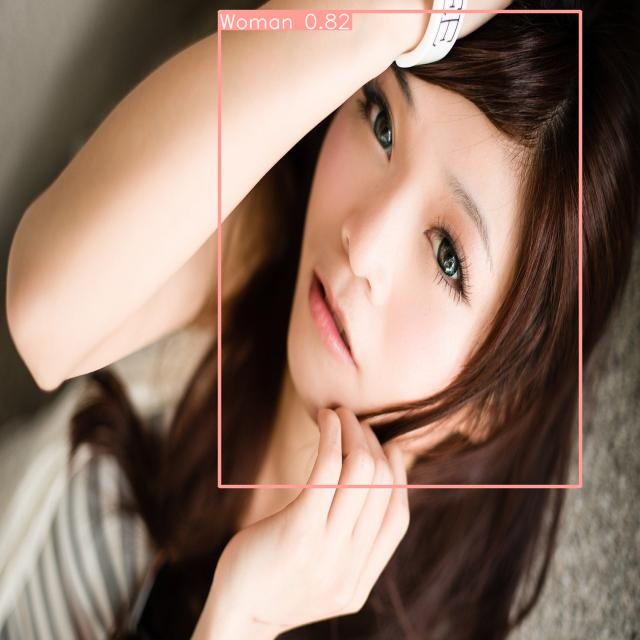

In [22]:
import glob
images = glob.glob('./runs/detect/predict/*.jpg')
for image in images[0:10]:
  display(Image(filename = image,width=400))